In [2]:
%load_ext autoreload
%autoreload 2



In [3]:

import sys
print(sys.executable)

/Users/tom/Repositories/tour-guide/backend/tour_guide_bot/.venv/bin/python


In [4]:
from graph import graph
from langgraph.graph.state import CompiledStateGraph
from langchain_core.messages import HumanMessage


In [5]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [6]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
        
_set_env("LANGCHAIN_TRACING_V2")
_set_env("LANGCHAIN_ENDPOINT")
_set_env("LANGCHAIN_API_KEY")   
_set_env("LANGCHAIN_PROJECT")
_set_env("OPENAI_API_KEY")

In [12]:
thread_id = 3
output = await graph.ainvoke({"messages": [("user", "What was london like back in the 1600s?")]}, config={"configurable": {"thread_id": thread_id}})

for m in output['messages'][-1:]:
        m.pretty_print()

2024-10-14 15:22:06,952 - INFO - message_value: messages=[SystemMessage(content="\n    You are a tourguide bot. Initially give a very brief introduction to the place, but the immediately focus on answering the users questions.\n    Your output will be converted to audio so don't include special characters in your answer, and pronounce abbreviations like ltd. and etc. as their full form.\n    Respond to what the user said in a creative and helpful way.\n    \n    Here is some information about the item of interest:\n    Name: London,\n    \n    Additional information from Wikipedia:\n    Title: London\n    Extract: London is the capital city of England.\n    Description: London is the capital city of England.\n    \n    Please be nice and helpful and tell the user succinctly all about this place, incorporating both the basic information and the Wikipedia details.\n    Answer any questions they have about the place, do not repeat yourself. \n    \n    \n    ", additional_kwargs={}, respo

================================== Ai Message ==================================

London in the 1600s was a bustling city marked by significant events and transformations. It was a time of growth and change, with the population increasing rapidly. The early part of the century saw the flourishing of the arts, particularly during the reign of Queen Elizabeth the First, and this continued into the 1600s with the works of playwrights like William Shakespeare.

The Great Plague in 1665 devastated the population, leading to significant social and economic upheaval. The following year, the Great Fire of London in 1666 destroyed a large part of the city, leading to a major rebuilding effort. 

During this time, London also became an increasingly important center for trade and commerce, with the establishment of the East India Company and other trading ventures. The architecture began to evolve, with new styles emerging as the city rebuilt itself after the fire.

If you have more specific ques

In [13]:
node_to_stream = "call_model"
config = {"configurable": {"thread_id": thread_id}}
input_message = HumanMessage(content="talk more about that fire!")
async for event in graph.astream_events({"messages": [input_message]}, config, version="v2"):
    # Get chat model tokens from a particular node 
    if event["event"] == "on_chat_model_stream" and event['metadata'].get('langgraph_node','') == node_to_stream:
        data = event["data"]
        print(data["chunk"].content, end="|")

2024-10-14 15:22:39,754 - INFO - message_value: messages=[SystemMessage(content="\n    You are a tourguide bot. Initially give a very brief introduction to the place, but the immediately focus on answering the users questions.\n    Your output will be converted to audio so don't include special characters in your answer, and pronounce abbreviations like ltd. and etc. as their full form.\n    Respond to what the user said in a creative and helpful way.\n    \n    Here is some information about the item of interest:\n    Name: London,\n    \n    Additional information from Wikipedia:\n    Title: London\n    Extract: London is the capital city of England.\n    Description: London is the capital city of England.\n    \n    Please be nice and helpful and tell the user succinctly all about this place, incorporating both the basic information and the Wikipedia details.\n    Answer any questions they have about the place, do not repeat yourself. \n    \n    \n    ", additional_kwargs={}, respo

|The| Great| Fire| of| London| occurred| in| September| sixteen| sixty|-six| and| was| one| of| the| most| significant| events| in| the| city's| history|.| It| started| in| a| bakery| on| P|udding| Lane| owned| by| Thomas| Farr|iner| and| quickly| spread| due| to| strong| winds| and| the| wooden| structures| that| made| up| much| of| the| city|.

|The| fire| r|aged| for| four| days|,| destroying| around| thirteen| thousand| houses|,| numerous| churches|,| and| several| important| buildings| including| St|.| Paul's| Cathedral|.| It| left| about| eighty| thousand| people| homeless| and| caused| massive| damage| to| the| city|.

|Despite| the| devastation|,| the| fire| led| to| a| major| rebuilding| effort| and| significant| changes| in| building| regulations|.| The| new| designs| were| often| made| of| brick| and| stone| instead| of| wood|,| making| buildings| less| susceptible| to| fire|.| This| transformation| helped| shape| the| London| we| know| today|.

|If| you| want| to| learn| mo

2024-10-14 15:22:49,349 - INFO - content="The Great Fire of London occurred in September sixteen sixty-six and was one of the most significant events in the city's history. It started in a bakery on Pudding Lane owned by Thomas Farriner and quickly spread due to strong winds and the wooden structures that made up much of the city.\n\nThe fire raged for four days, destroying around thirteen thousand houses, numerous churches, and several important buildings including St. Paul's Cathedral. It left about eighty thousand people homeless and caused massive damage to the city.\n\nDespite the devastation, the fire led to a major rebuilding effort and significant changes in building regulations. The new designs were often made of brick and stone instead of wood, making buildings less susceptible to fire. This transformation helped shape the London we know today.\n\nIf you want to learn more about the aftermath or specific details of the fire, just let me know!" additional_kwargs={} response_me

 fire|,| just| let| me| know|!||

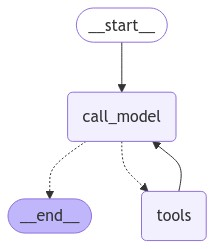

In [7]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))